# Método da Bissecção

O método da bissecção é uma técnica numérica para encontrar raízes de funções contínuas.  
Ele funciona dividindo repetidamente um intervalo em duas partes e selecionando a subparte onde a raiz está localizada.  
Este processo continua até que a raiz seja encontrada com uma precisão desejada.

## Importação das Bibliotecas

In [1]:
!pip install numpy matplotlib tabulate sympy

                                              0.0/12.9 MB ? eta -:--:--
                                              0.1/12.9 MB 2.3 MB/s eta 0:00:06
                                              0.2/12.9 MB 2.9 MB/s eta 0:00:05
     -                                        0.5/12.9 MB 3.9 MB/s eta 0:00:04
     --                                       0.8/12.9 MB 4.9 MB/s eta 0:00:03
     --                                       0.9/12.9 MB 4.3 MB/s eta 0:00:03
     ---                                      1.2/12.9 MB 4.4 MB/s eta 0:00:03
     ----                                     1.5/12.9 MB 4.6 MB/s eta 0:00:03
     -----                                    1.7/12.9 MB 4.8 MB/s eta 0:00:03
     ------                                   2.0/12.9 MB 5.0 MB/s eta 0:00:03
     -------                                  2.4/12.9 MB 5.2 MB/s eta 0:00:03
     --------                                 2.7/12.9 MB 5.3 MB/s eta 0:00:02
     ---------                                3.0/12.9 MB 5


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import sys
import os

# Obtém o caminho absoluto do diretório do notebook
notebook_dir = os.path.abspath('')

# Adiciona o diretório pai ao sys.path para reconhecer "Graph"
sys.path.append(os.path.join(notebook_dir, '..'))

import numpy as np
import sympy as sp
from tabulate import tabulate
from Graph.graph import plotar_funcao

Matplotlib is building the font cache; this may take a moment.


## Implementação do Método da Bisseção

In [9]:
def bissecao(f, a, b, tol=1e-6):
    """
    Implementa o método da bisseção para encontrar a raiz de uma função.
    
    Parâmetros:
    f  -- Função contínua
    a  -- Extremidade esquerda do intervalo
    b  -- Extremidade direita do intervalo
    tol -- Tolerância para o erro (padrão: 1e-6)
    
    Retorna:
    raiz aproximada e tabela com as iterações
    """
    if f(a) * f(b) >= 0:
        raise ValueError("O intervalo não contém uma raiz ou possui múltiplas raízes.")
    
    max_iter = int(np.ceil(np.log2((b - a) / tol)))
    iter = 0
    tabela = []
    raiz_anterior = None
    
    while True:
        c = (a + b) / 2
        erro_absoluto = round(abs(c - raiz_anterior), 4) if raiz_anterior is not None else None
        erro_relativo = abs((c - raiz_anterior) / c) if raiz_anterior is not None else None
        tabela.append([iter, a, b, c, f(c), abs(b - a), erro_absoluto, erro_relativo])
        raiz_anterior = c
        iter += 1
        
        if erro_absoluto and erro_absoluto < tol and iter >=8:
            break
        
        if f(c) == 0:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    
    return c, tabela, max_iter

## Aplicação do Método

<lambdifygenerated-6>:2: RuntimeWarning: invalid value encountered in log
  return x**2 + log(x)


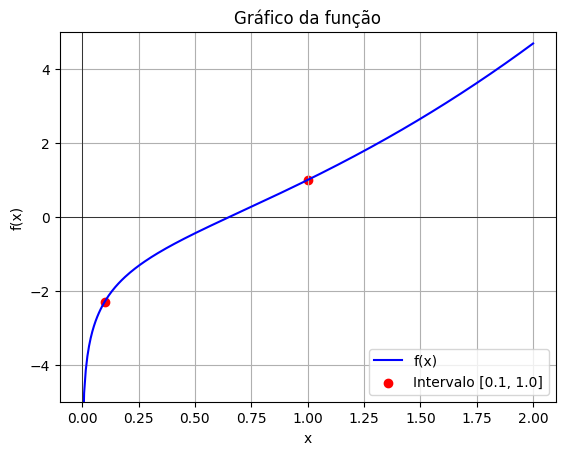

  Iteração       a       b       c     f(c)    Erro    Erro Absoluto    Erro Relativo
----------  ------  ------  ------  -------  ------  ---------------  ---------------
         0  0.1000  1.0000  0.5500  -0.2953  0.9000
         1  0.5500  1.0000  0.7750   0.3457  0.4500           0.2250           0.2903
         2  0.5500  0.7750  0.6625   0.0272  0.2250           0.1125           0.1698
         3  0.5500  0.6625  0.6063  -0.1329  0.1125           0.0563           0.0928
         4  0.6063  0.6625  0.6344  -0.0527  0.0563           0.0281           0.0443
         5  0.6344  0.6625  0.6484  -0.0127  0.0281           0.0141           0.0217
         6  0.6484  0.6625  0.6555   0.0072  0.0141           0.0070           0.0107
         7  0.6484  0.6555  0.6520  -0.0027  0.0070           0.0035           0.0054
Raiz aproximada: 0.6520
Máximo de Iterações: 7


In [10]:
# Entrada do usuário
x = sp.Symbol('x')
expressao = input("Digite a função em termos de x (ex: sin(x) + exp(x)): ")
funcao = sp.lambdify(x, sp.sympify(expressao), 'numpy')

a = float(input("Digite o limite inferior do intervalo: "))
b = float(input("Digite o limite superior do intervalo: "))
tol = float(input("Digite o limite de erro: "))

plotar_funcao(funcao, a, b)

# Aplicando o método da bisseção
raiz, tabela, max_iter = bissecao(funcao, a, b, tol)

# Exibindo resultados
print(tabulate(tabela, headers=["Iteração", "a", "b", "c", "f(c)", "Erro", "Erro Absoluto", "Erro Relativo"], floatfmt=".4f"))
print(f"Raiz aproximada: {raiz:.4f}")
print(f"Máximo de Iterações: {max_iter}")

### Prova RAIZES semestre passado

- Questão 1:
    - a - 0.0054
    - b - 0.6520 => CORRETO
    - c - 7 => CORRETO

===============================================

- Questão 2:
    - a - -1.1060 => CORRETO
    - b - -1.1061, 0.0000 => CORRETO
    - c - -1.1061, 0.0000 => 
    - d - ATENÇÃO PARA AJUSTAR DIVISÃO POR 0 SECANTE

===============================================

Questão 3:

OBS: Melhorar gráfico para marcar as raizes na curva